Found 3115 files belonging to 36 classes.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


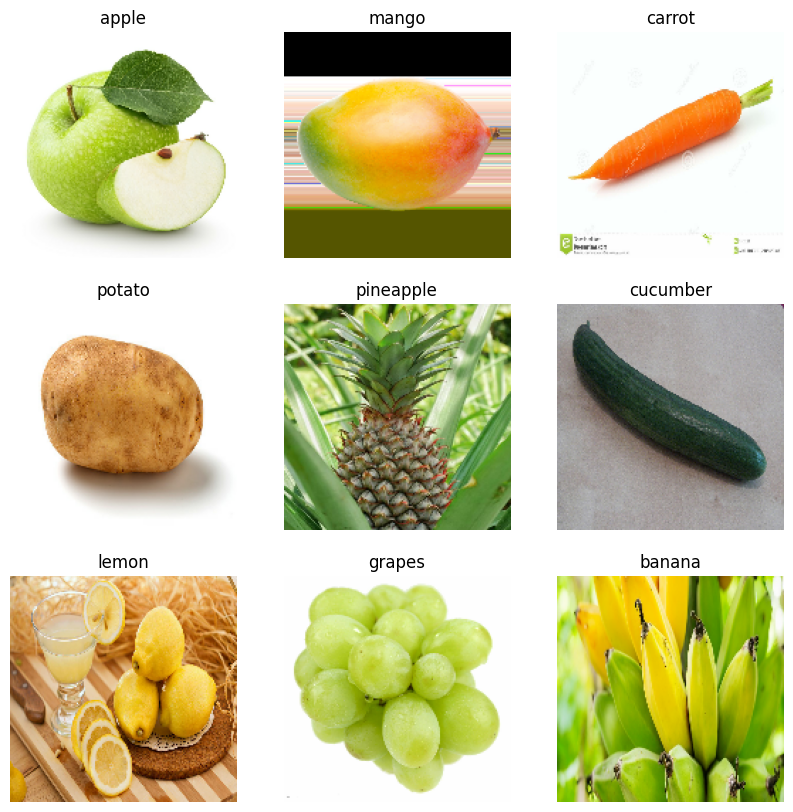

In [3]:
# Import packages
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import tensorflow.keras as kb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download the dataset and link file paths to test/train/validation sets
train_dir = 'C:/Users/isaac/Documents/datasets/fruitveggie/train'
test_dir = 'C:/Users/isaac/Documents/datasets/fruitveggie/test'
validation_dir = 'C:/Users/isaac/Documents/datasets/fruitveggie/validation'

# Dictate Parameters
batch_size = 32
image_height = 160
image_width = 160

# Processing data to create visualization
train_raw = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                image_size = (image_height, image_width),
                                                                batch_size = batch_size)

names = train_raw.class_names
print(names)

plt.figure(figsize = (10, 10))
for images, label in train_raw.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(names[label[i]])
        plt.axis('off')



In [5]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_gen = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode = 'categorical'
)

# Creating the Convolutional Neural Network Model
model = kb.Sequential([
    kb.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (image_height, image_width, 3)),
    kb.layers.MaxPooling2D(2,2),
    kb.layers.Conv2D(64, (3,3), activation = 'relu'),
    kb.layers.MaxPooling2D(2,2),
    kb.layers.Conv2D(128, (3,3), activation = 'relu'),
    kb.layers.MaxPooling2D(2,2),
    kb.layers.Conv2D(256, (3,3), activation = 'relu'),
    kb.layers.MaxPooling2D(2,2),
    kb.layers.Conv2D(128, (3,3), activation = 'relu'),
    kb.layers.MaxPooling2D(2,2),
    kb.layers.Flatten(),
    kb.layers.Dense(128, activation = 'relu'),
    kb.layers.Dropout(0.3),
    kb.layers.Dense(64, activation = 'relu'),
    kb.layers.Dropout(0.5),
    kb.layers.Dense(36, activation='softmax')
])

# Compiling the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Printing out the model summary
model.summary()

# Fitting the model
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.n,
    epochs = 100,
    validation_data = validation_gen,
    validation_steps = validation_gen.n)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 79, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 36, 36, 128)       73856     
                                   

In [ ]:
# Grabbing metrics from model via .evaluate
train_loss, train_accuracy = model.evaluate(train_gen)
test_loss, test_accuracy = model.evaluate(validation_gen)

# Printing out metrics
print('Train loss:', train_loss)
print('Train accuracy:', train_accuracy)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)